# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.read_csv('sharktank.csv')

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [2]:
df = pd.read_csv('sharktank.csv')

There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
# The code below will only update the NaN values under the sharks
df[['Corcoran', 'Cuban', 'Greiner', 'Herjavec', 'John', 'O\'Leary', 'Harrington', 'Guest']] = df[['Corcoran', 'Cuban', 'Greiner', 'Herjavec', 'John', 'O\'Leary', 'Harrington', 'Guest']].fillna(value=0)
df

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
# updating all NaN values to 0 anyway for streamlined equity calculations
df.fillna(0, inplace=True)

# Replacing commas, dollar signs, and percents with empty string
df.replace(',','', regex=True, inplace=True)
df.replace('\$','', regex=True, inplace=True)
df.replace('%','', regex=True, inplace=True)

# Updating datatype of 'Amount' and reformating 'Equity'
df['Amount'] = df['Amount'].astype(int)
df['Equity'] = df['Equity'].astype(float)/100.0

## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [5]:
# Copying dataframe to update No deal equities to nonzero values, so we dont end up dividing by 0
df2 = df.copy()
df2['Equity']=df2['Equity'].replace(0,1)
df2['Valuation'] = df2['Amount']/df2['Equity']

# Locating the max valuation and max amount companies 
max_val = df2.loc[df2['Valuation'] == df2['Valuation'].max()]
max_amt = df2.loc[df2['Amount'] == df2['Amount'].max()]

# Printing out answer
print(max_val.iat[0,2], 'is the most valuable company, valued at ', str(int(max_val.iat[0,17])), 'dollars.')
print(max_amt.iat[0,2], 'received the largest total with amount,', max_amt.iat[0,6], 'dollars')

Zipz is the most valuable company, valued at  25000000 dollars.
AirCar received the largest total with amount, 5000000 dollars


**YOUR EXPLANATION HERE**

We can see that Zipz was the most valuable company at $25000000, however they were only given 2.5 million dollars for a 10% equity, meaning they were overshadowed by AirCar who received a 5 million dollar funding for 20% equity in pure dollar value.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [6]:
# Adding new column to dataframe that counts the total number of investors for that company
df['Num Investors'] = df.iloc[:,8:16].sum(axis=1)

# Adding new column to dataframe for adjusted amount that a shark would have to invest in a company
df['Adjusted Amount'] = df['Amount']/df['Num Investors']

# Dictionary for storing the total investing amounts for each shark
amounts = {}

# Tallying each shark's adjusted amounts and adding them to the dictionary 
for i in range(8,16):
    name = df.columns[i]
    amounts[name] = df.groupby(name)['Adjusted Amount'].sum().iloc[1]

# Printing shark with highest investment
print(max(amounts, key=amounts.get), 'invested the most, with a total of', max(amounts.values()), 'dollars.')

Cuban invested the most, with a total of 17817500.0 dollars.


**YOUR EXPLANATION HERE**

To calculate individual investments of sharks when multiple people were involved in a deal, we decided to create a new column that counted the number of investors in the deal, and used that value to calculate each investors share of the investment 

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

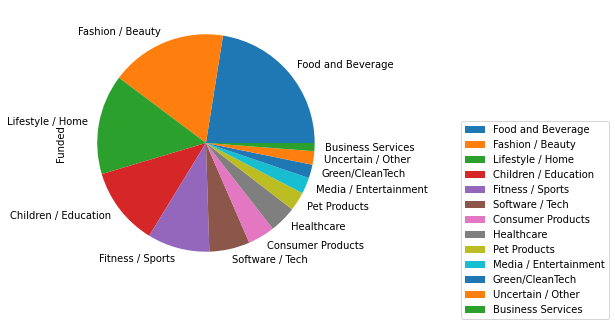

,Funded,Funding Rate
Industry,,
Food and Beverage,56,0.224900
Fashion / Beauty,43,0.172691
Lifestyle / Home,37,0.148594
Children / Education,29,0.116466
Fitness / Sports,23,0.092369
Software / Tech,15,0.060241
Consumer Products,10,0.040161
Healthcare,10,0.040161
Pet Products,7,0.028112


In [14]:
# Mapping Yes and No's to 0's and 1's 
df['Funded'] = df['Deal'].map(dict(Yes=1,No=0))

# Tallying mapped values and calculating their funding rates
fund_counts = df.groupby('Industry')[['Funded']].sum()
fund_counts['Funding Rate'] = fund_counts['Funded']/fund_counts['Funded'].sum()
fund_counts = fund_counts.sort_values(["Funded"], ascending=False)
fund_counts.plot.pie(y='Funded', figsize=(5, 5))
plt.legend(bbox_to_anchor = (2.0, 0.6))
plt.show()
fund_counts


**YOUR EXPLANATION HERE**

From the chart and the table, we can see that there is not an even distribution among the different industries, some with funding rates around 15-20% all the way down to 1-2%. We can see that the food and beverage industry received the most funding, at a funding rate of 22.5% of all funded companies, and the Business Service industry received the lowest funding, with only 1.2% of funded companies.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF to Gradescope and Notebook (ipynb) to iLearn
4. Demo your lab.